In [8]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('athlete_events.csv', 'athlete_events'),
# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Ss@858585',
    database='Olympics'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:/Users/Olympics_data'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing athlete_events.csv
NaN values before replacement:
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64



In [9]:
db = mysql.connector.connect(host = 'localhost',
                             username = 'root',
                             password = 'Ss@858585',
                             database = 'Olympics')
cur = db.cursor()

# 1. How many olympics games have been held?

In [10]:
query = """ SELECT COUNT(DISTINCT(Games)) AS total_olympic_games FROM athlete_events; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['total_olympic_games'])

df


,total_olympic_games
0,51


# 2. List down all Olympics games held so far.

In [11]:
query = """ SELECT DISTINCT (Year),Season,city FROM athlete_events
ORDER BY Year; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Year','Season','city'])

df

,Year,Season,city
0,1896,Summer,Athina
1,1900,Summer,Paris
2,1904,Summer,St. Louis
3,1906,Summer,Athina
4,1908,Summer,London
5,1912,Summer,Stockholm
6,1920,Summer,Antwerpen
7,1924,Summer,Paris
8,1924,Winter,Chamonix
9,1928,Summer,Amsterdam


# 3. Mention the total no of nations who participated in each olympics game?

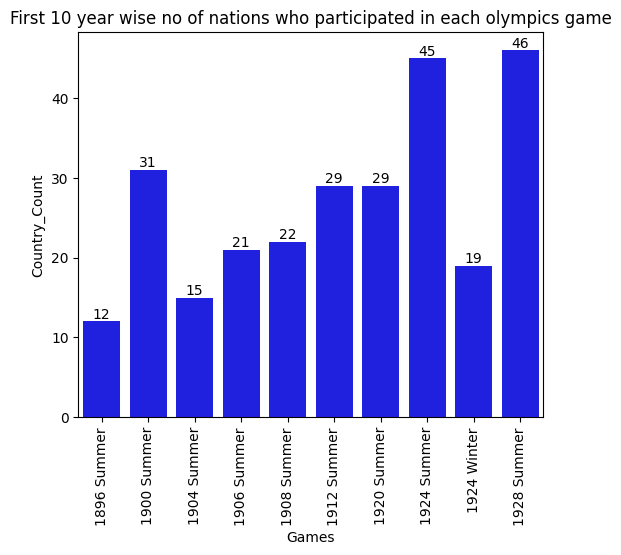

In [30]:
query = """ SELECT Games , COUNT(DISTINCT(NOC)) AS Country_Count From athlete_events
GROUP BY Games
ORDER BY Games;; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Games','Country_Count'])

plt.figure(figsize = (6,5))
ax=sns.barplot( x = x ['Games'], y = x['Country_Count'], data = x , color = 'blue')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title('First 10 year wise no of nations who participated in each olympics game')
plt.show()

x = df.head(10)

# 4. Which year saw the highest and lowest no of countries participating in olympics

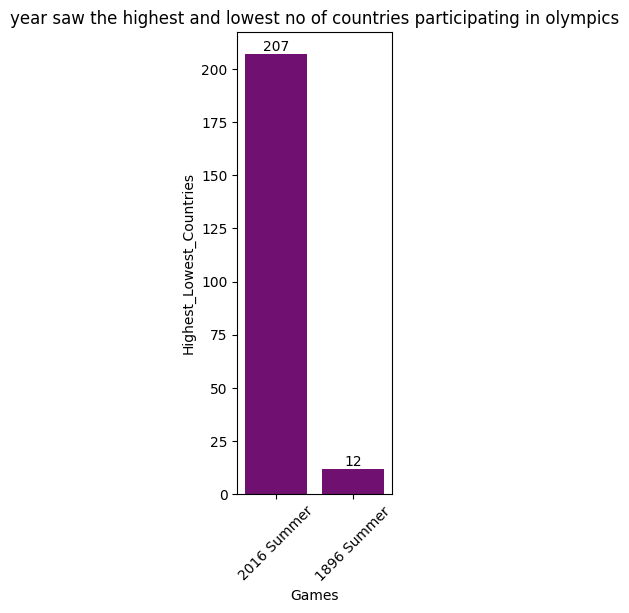

In [42]:
query = """ 
     (SELECT Games, COUNT(DISTINCT NOC) as highest_lowest_countries
      FROM athlete_events
	  GROUP BY Games
       ORDER BY  highest_lowest_countries DESC
	   LIMIT 1)
  UNION
      (SELECT Games, COUNT(DISTINCT NOC) AS highest_lowest_countries
       FROM athlete_events
	   GROUP BY Games
       ORDER BY  highest_lowest_countries
	   LIMIT 1);

 """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Games','Highest_Lowest_Countries'])

df

plt.figure(figsize = (2,6))
ax=sns.barplot( x = df ['Games'], y = df['Highest_Lowest_Countries'], data = df , color = 'purple')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title('year saw the highest and lowest no of countries participating in olympics')
plt.show()


# 5. Which nation has participated in all of the olympic games

In [43]:
query = """ WITH CTE AS 
       (SELECT team,games,DENSE_RANK() OVER(PARTITION BY team ORDER BY games) as dr
		FROM athlete_events)
      SELECT DISTINCT team
      FROM CTE 
             WHERE dr=(SELECT COUNT(DISTINCT games) FROM athlete_events);; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Team'])

df

,Team
0,France
1,Great Britain
2,Italy
3,Switzerland


# Reestablish The Connection

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
db = mysql.connector.connect(host = 'localhost',
                             username = 'root',
                             password = 'Ss@858585',
                             database = 'Olympics')
cur = db.cursor()

# 6. Identify the sport which was played in all summer olympics.

In [17]:
query = """  WITH CTE AS(SELECT sport,games,DENSE_RANK() OVER(PARTITION BY sport ORDER BY games) as rnk
             FROM athlete_events AS tab1
			 WHERE season='Summer'
             GROUP BY  games,sport)
    SELECT sport FROM CTE 
               WHERE rnk=(SELECT COUNT(DISTINCT games) FROM athlete_events WHERE season='Summer'); """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Team'])

df

,Team
0,Athletics
1,Cycling
2,Fencing
3,Gymnastics
4,Swimming


# 7. Fetch the total no of sports played in each olympic games.

In [3]:
query = """  SELECT Games , COUNT(DISTINCT(sport)) AS no_of_sports FROM athlete_events
GROUP BY Games
ORDER BY no_of_sports DESC; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Games','No_of_Sports'])

df

,Games,No_of_Sports
0,2004 Summer,34
1,2016 Summer,34
2,2008 Summer,34
3,2000 Summer,34
4,2012 Summer,32
5,1996 Summer,31
6,1992 Summer,29
7,1988 Summer,27
8,1920 Summer,25
9,1984 Summer,25


# 8. Fetch oldest athletes to win a gold medal

In [5]:
query = """      WITH CTE AS(SELECT * ,DENSE_RANK() OVER (ORDER BY  age DESC) as dr
         FROM athlete_events AS tab1
		 WHERE medal ='Gold' AND age IS NOT NULL)
	SELECT name, sex, age, team,games, season, sport, event
      FROM CTE 
	  WHERE dr=1
      LIMIT 2; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['name', 'sex', 'age', 'team','games', 'season', 'sport', 'event'])

df

,name,sex,age,team,games,season,sport,event
0,Oscar Gomer Swahn,M,64.0,Sweden,1912 Summer,Summer,Shooting,"Shooting Men's Running Target, Single Shot, Team"
1,Charles Jacobus,M,64.0,United States,1904 Summer,Summer,Roque,Roque Men's Singles


# 9. Fetch the top 5 most successful countries in olympics. Success is defined by no of medals won.

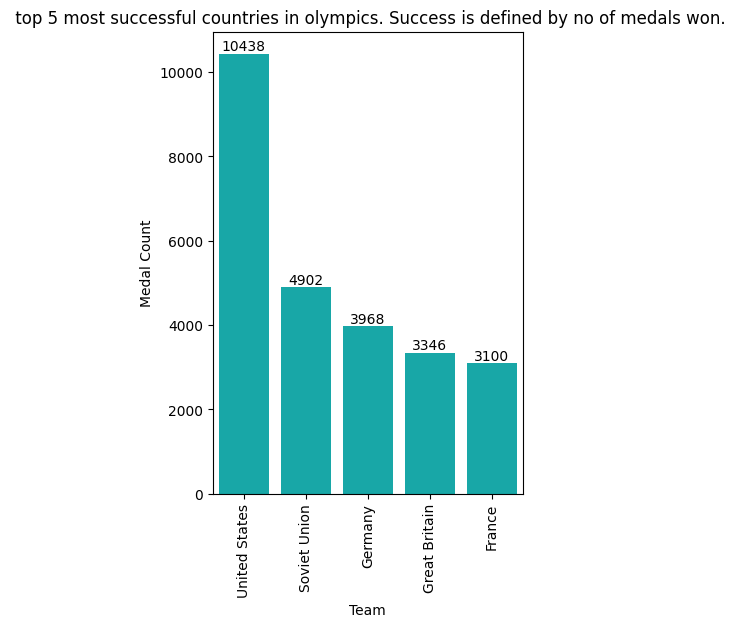

In [13]:
query = """SELECT team, COUNT(medal) as medal_count
           FROM athlete_events
           GROUP BY team
           ORDER BY medal_count DESC
            LIMIT 5 ;"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Team','Medal Count'])

df

plt.figure(figsize = (4,6))
ax=sns.barplot( x = df ['Team'], y = df['Medal Count'], data = df , color = 'c')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title(' top 5 most successful countries in olympics. Success is defined by no of medals won.')
plt.show()

# 10. Top 10 gold, silver and bronze medals won by each country.

In [15]:
query = """SELECT Team ,
COUNT(CASE WHEN Medal = 'Gold' THEN 1 ELSE NULL END) AS Gold_Medal_Count,
COUNT(CASE WHEN Medal = 'Silver' THEN 1 ELSE NULL END) AS Silver_Medal_Count,
COUNT(CASE WHEN Medal = 'Bronze' THEN 1 ELSE NULL END) AS Bronze_Medal_Count
FROM athlete_events
GROUP BY Team
ORDER BY Gold_Medal_Count DESC ,Silver_Medal_Count DESC , Bronze_Medal_Count DESC
LIMIT 10;"""

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Team','Gold_Medal_Count','Silver_Medal_Count','Bronze_Medal_Count'])

df

,Team,Gold_Medal_Count,Silver_Medal_Count,Bronze_Medal_Count
0,United States,4948,3024,2466
1,Soviet Union,2116,1432,1354
2,Germany,1358,1254,1356
3,Italy,1070,1016,968
4,Great Britain,1038,1164,1144
5,France,910,1036,1154
6,Sweden,902,952,1014
7,Hungary,864,660,730
8,Canada,844,826,816
9,East Germany,738,618,526


# 11. In which Sport/event, India has won highest medals.

In [16]:
query = """ SELECT Sport , COUNT(Medal) AS total_medal FROM athlete_events
WHERE Team = 'India'
GROUP BY Sport
ORDER BY total_medal DESC
LIMIT 1; """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data , columns = ['Sport','Total_Medal'])

df

,Sport,Total_Medal
0,Hockey,346
